In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
y, sr = librosa.load("/home/adit/Downloads/EE798P/Datasets/Melody Estimation/adc2004_full_set/daisy1.wav")

# Compute the spectogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

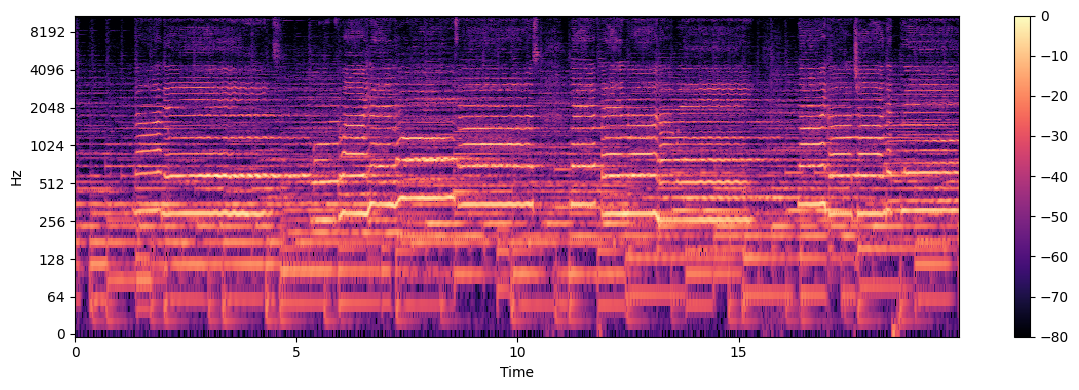

In [3]:
idx = slice(*librosa.time_to_frames([0, 20], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [4]:
S_filter = librosa.decompose.nn_filter(S_full, aggregate=np.median, metric='cosine', width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

In [30]:
margin_i, margin_v = 2, 15
power = 1

mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter), power=power)
mask_v = librosa.util.softmask(S_full - S_filter, margin_v * S_filter, power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

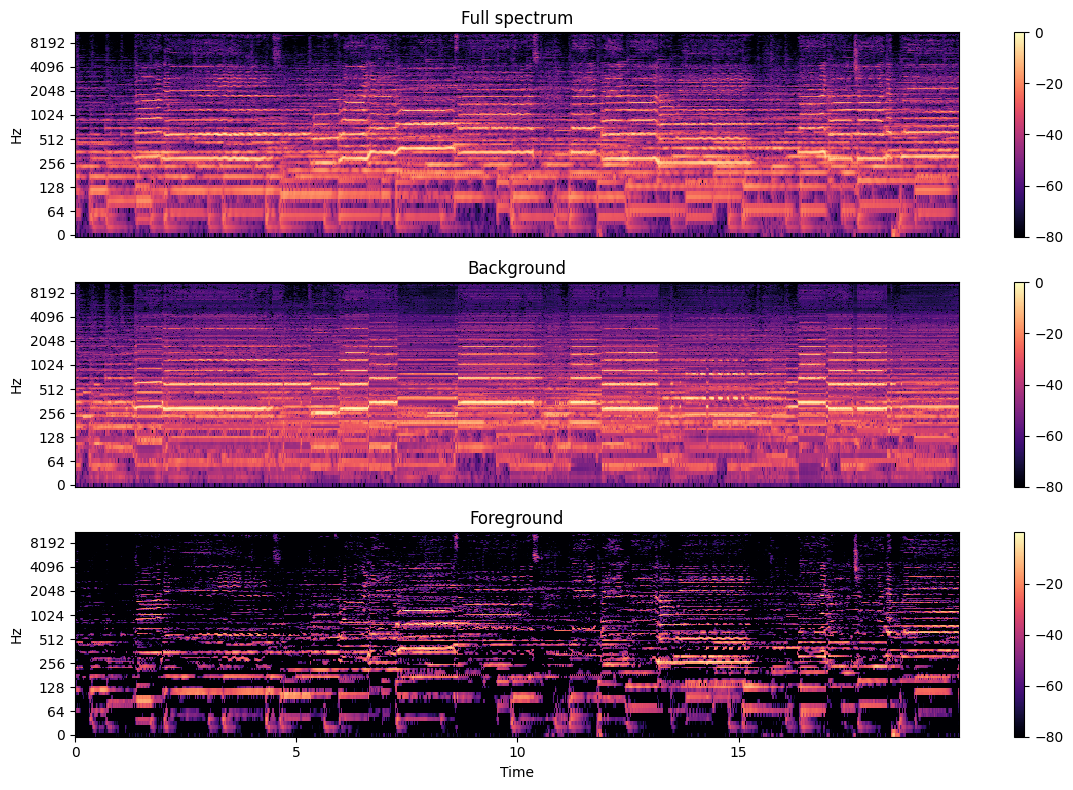

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max), y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [32]:
y_foreground = librosa.istft(S_foreground * phase)

In [34]:
from IPython.display import Audio

In [35]:
Audio(y_foreground, rate=sr)